# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.2.4'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [13]:
harry_df = movies[movies.title.str.contains('Harry Potter',case=False)]
harry_df.sort_values(by=['year'],ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [14]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [16]:
#Indexing and logical operators
movies_2000 = len(movies[movies.year <= 2018]) and len(movies[movies.year >= 2000])
print(movies_2000)

115471


### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
len(movies[movies.title.str.contains("Hamlet",case=False)])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [18]:
hamlet_df = movies[movies.title.str.contains("Hamlet",case=False)]
hamlet_df[hamlet_df['year'] >= 2000].sort_values(by='year',ascending=True)

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [19]:
inception_df = cast[cast.title == 'Inception']
inception_df.head()
inception_df['n'].isnull().sum()

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [20]:
len(inception_df) - inception_df['n'].isnull().sum()

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [21]:
inception_df.sort_values(by='n', ascending=True).head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [22]:
dmbl_df = cast[cast.character.str.contains("Albus Dumbledore", case=False)]
dmbl_df

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [23]:
x = dmbl_df['name'].unique()
for i in x:
    print(i)

Dane Farwell
Michael Gambon
Richard Harris
George (X) O'Connor
Toby Regbo
Timothy Tedmanson


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [24]:
kr_df = cast[cast.name.str.contains("Keanu Reeves",case=False)]
len(kr_df)

62

In [25]:
kr_df[kr_df['year'] >= 1999].sort_values(by='year',ascending=True)['character']

1892370                 Himself
1892369                 Dogstar
1892390                     Neo
1892387        Donnie Barksdale
1892398                 Griffin
1892397             Shane Falco
1892383             Nelson Moss
1892358           Conor O'Neill
1892391                     Neo
1892379           Julian Mercer
1892392                     Neo
1892351                 Dogstar
1892348        John Constantine
1892400             Perry Lyman
1892388              Alex Wyler
1892343              Bob Arctor
1892382    Detective Tom Ludlow
1892385                  Klaatu
1892396            Chris Nadeau
1892359             Henry Torne
1892357                    John
1892342                     Kai
1892368             Donaka Mark
1892361               John Wick
1892366                    Evan
1892365                   Keanu
1892393                    Hank
1892353        Detective Galban
1892399                  Ramsey
1892384               The Dream
1892381            Keanu Reeves
1892362 

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [26]:
len(cast[cast['year'] <= 1960]) - len(cast[cast['year'] <= 1950])

212238

In [27]:
len(cast[cast['year'] <= 2017]) - len(cast[cast['year'] <= 2007])

1362104

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [28]:
len((cast[cast.year >= 2000]).notnull())

1949762

In [29]:
#len((cast[cast['n'] > 1]['year'] >= 2000).n.notnull())
t_df = cast[cast['year'] >= 2000]
t_df_nn = t_df[t_df['n'].notnull()]
len(t_df_nn[t_df_nn['n'] > 1])

1001710

In [30]:
#Same as above
len(cast[cast['n'].isnull() == True]['year'] >= 2000)

1458573

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [31]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
Maya                    12
The Outsider            12
Othello                 11
Freedom                 11
Honeymoon               11
The Three Musketeers    11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

<AxesSubplot:>

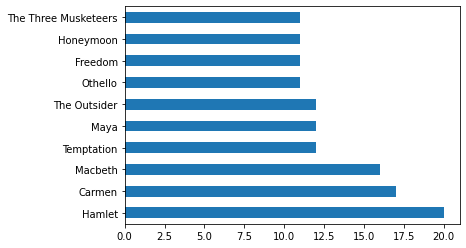

In [32]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [33]:
#top_three = movies.year.value_counts()[:10]
movies[movies['year'] >= 2000].year.value_counts().sort_values(ascending=False)[:3]

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

<AxesSubplot:ylabel='year'>

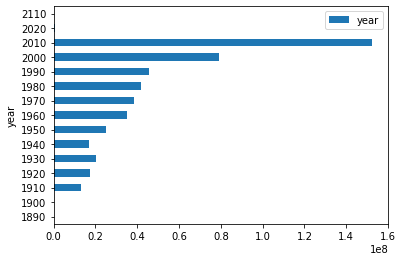

In [34]:
sorted_movies = movies.sort_values(by=['year'])
sorted_movies.head(10)
reqd_decades = sorted_movies.groupby((sorted_movies.year//10)*10).sum()
reqd_decades.plot(kind='barh')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [35]:
cast['character'].value_counts().sort_values(ascending=False)[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [36]:
cast[cast['character'] == 'Herself'].name.value_counts()[:10]

Queen Elizabeth II        12
Joyce Brothers             9
Mar?a Luisa (V) Mart?n     9
Luisa Horga                9
Hillary Clinton            8
Margaret Thatcher          8
In?s J. Southern           6
Rekha                      6
Oprah Winfrey              6
Marta Berrocal             6
Name: name, dtype: int64

In [37]:
cast[cast['character'] == 'Himself'].name.value_counts()[:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [38]:
cast[cast.character.str.startswith('zombie')].character.value_counts()

zombie                 17
zombie in the woods     1
Name: character, dtype: int64

In [39]:
cast[cast.character.str.startswith('police')].character.value_counts()[:10]

policeman                                9
police officer                           6
policewoma                               1
police officer Eastwood                  1
policejn? reditel dvorn? rada Krikava    1
police detective                         1
police detective C                       1
police detective E                       1
police detective B                       1
police officer (Court Scene)             1
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

<AxesSubplot:ylabel='year'>

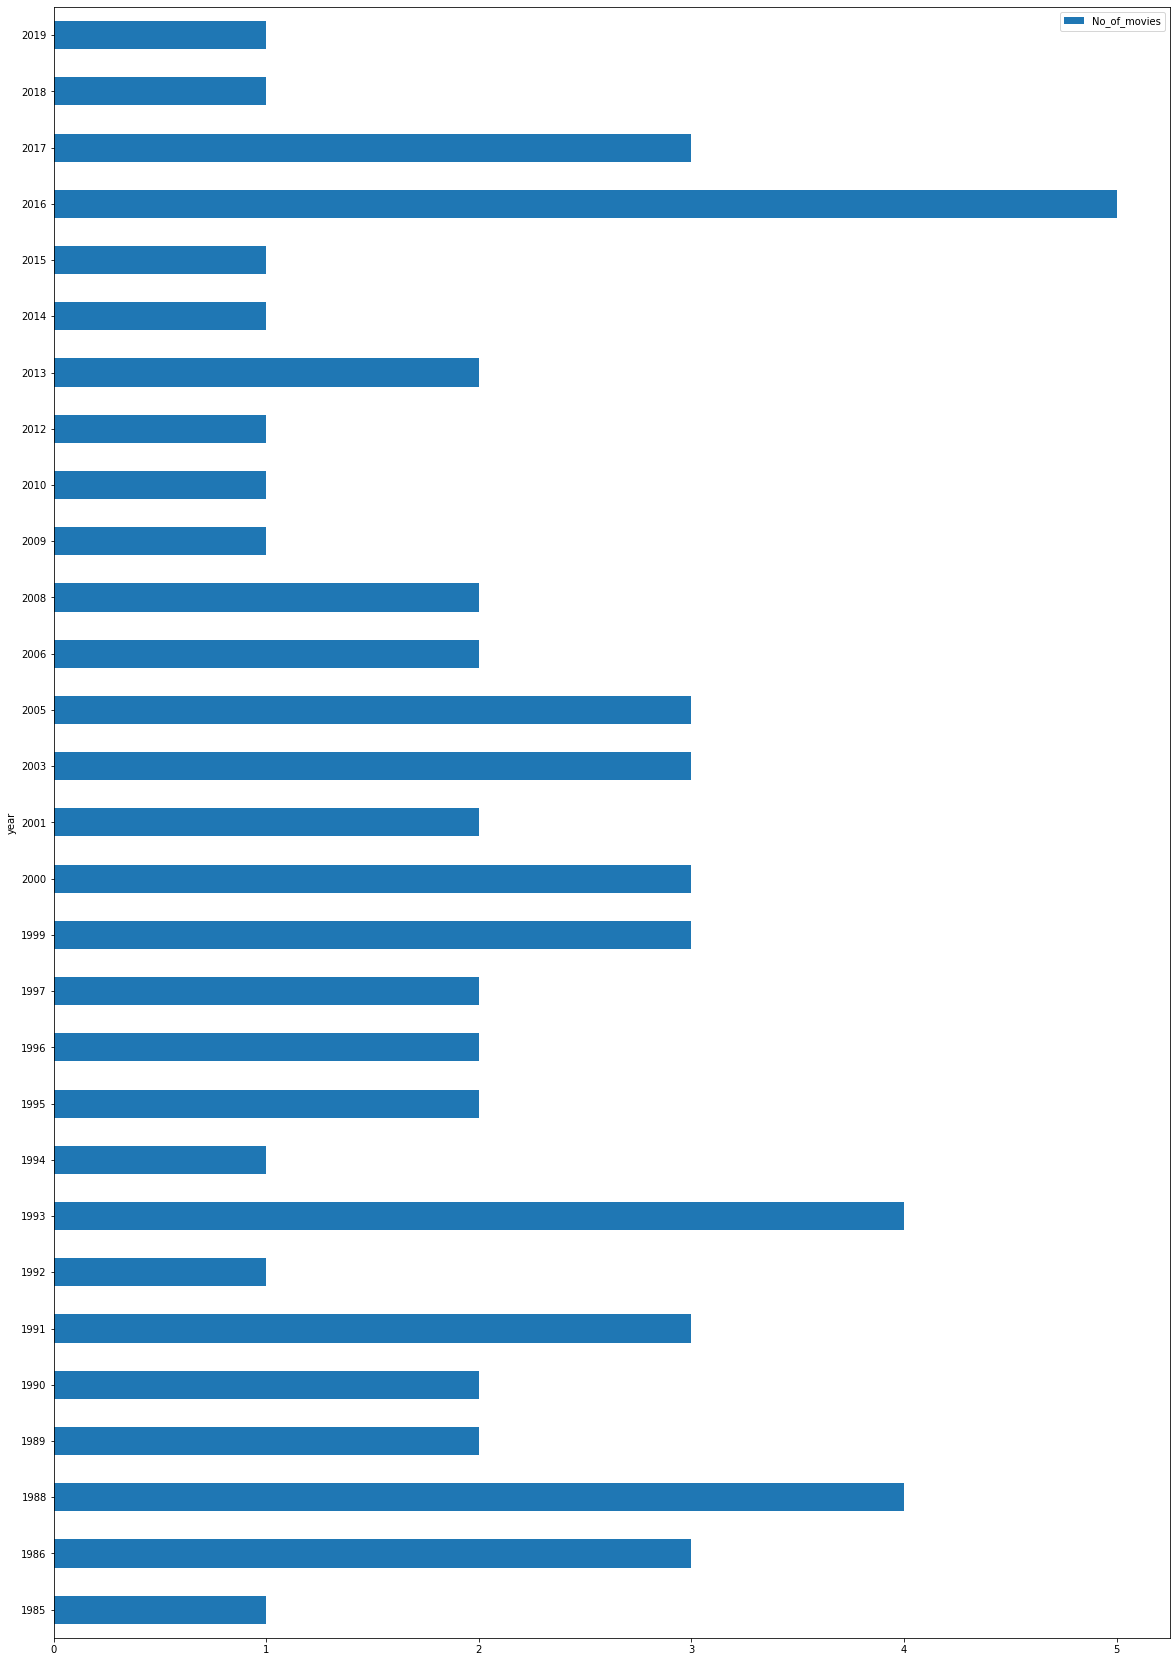

In [40]:
#Doubt
kr_df = cast[cast['name'] == "Keanu Reeves"]
#for key,value in kr_df.groupby('year'):
grouped_kr = kr_df.groupby('year')   
req_dict = {'year':[],'No_of_movies':[]}
for key, value in grouped_kr:
    req_dict['year'].append(key)
    req_dict['No_of_movies'].append(value['title'].value_counts().sum())
kr_df2 = pd.DataFrame.from_dict(req_dict)
kr_df2.plot(kind='barh',x='year',y='No_of_movies',figsize=(20,30))

    #print(key,value['title'].value_counts().sum())

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


<AxesSubplot:ylabel='year'>

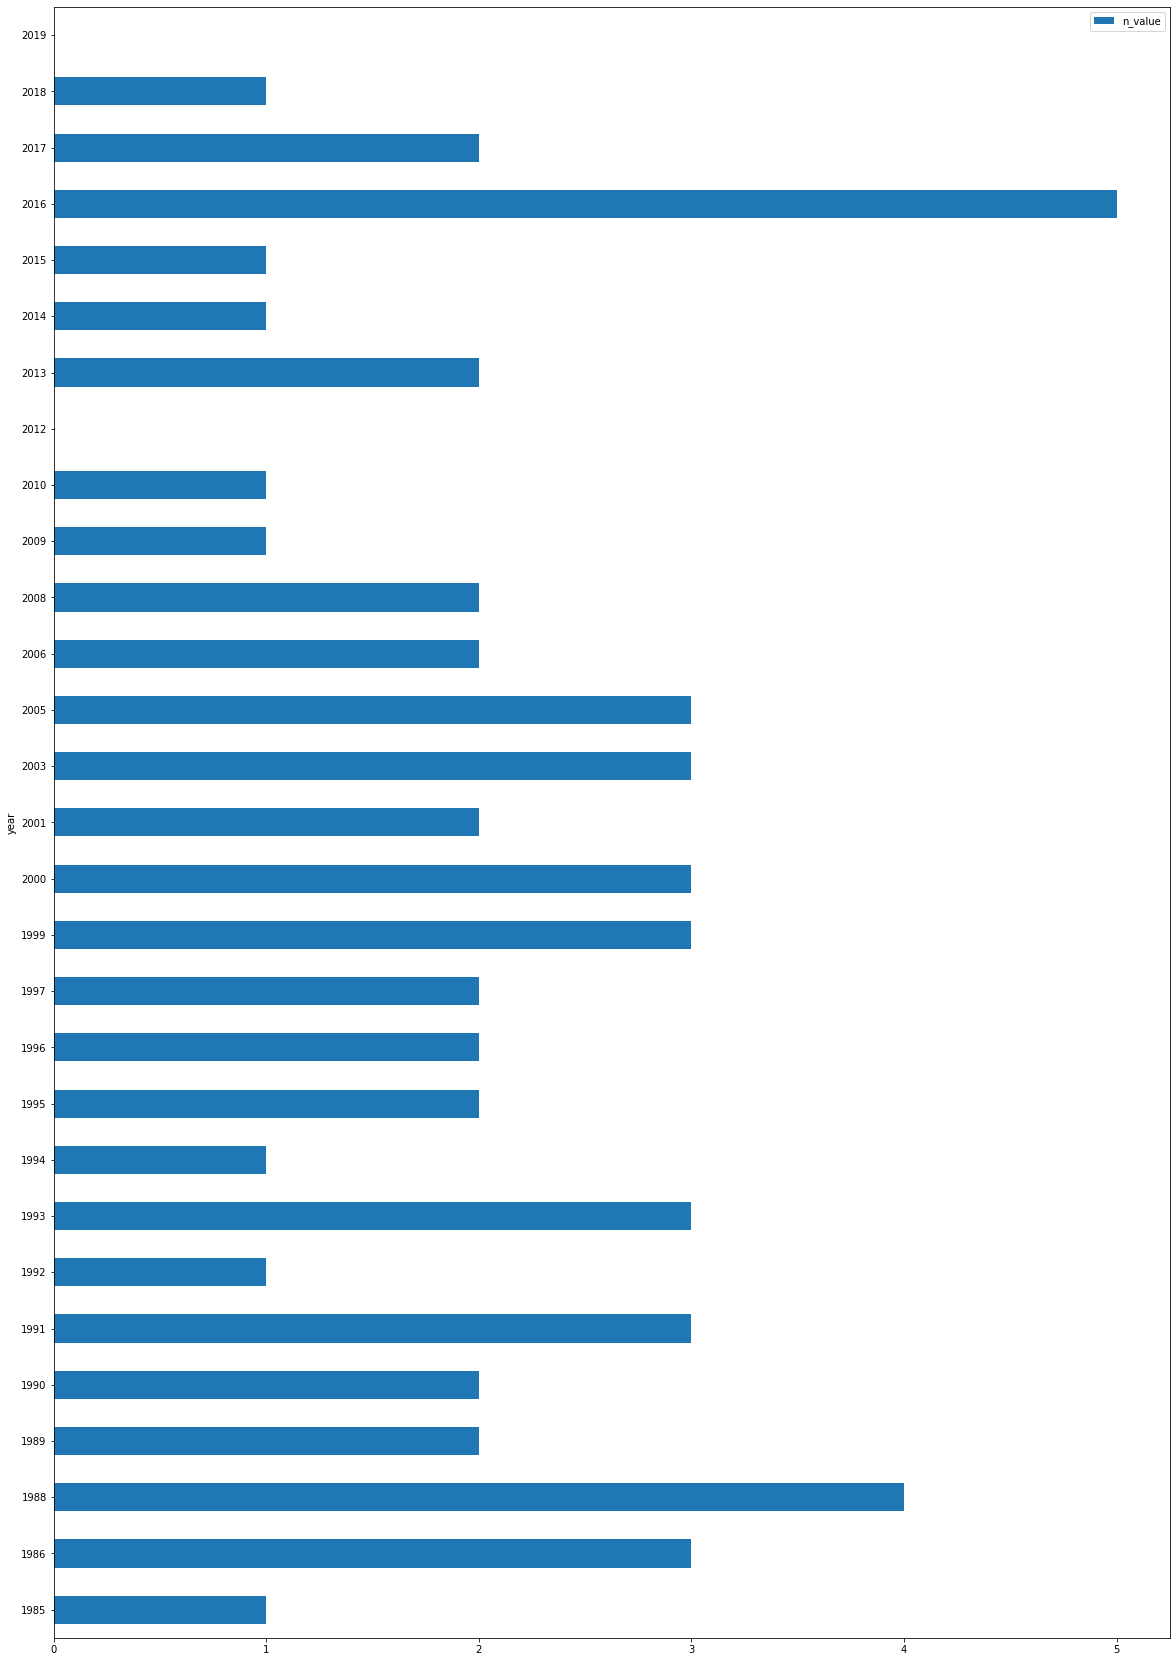

In [41]:
#Doubt
#for key,value in kr_df.groupby('year'):
grouped_kr_n = kr_df.groupby('year')   
req_dict2 = {'year':[],'n_value':[]}
for key, value in grouped_kr_n:
    req_dict2['year'].append(key)
    req_dict2['n_value'].append(value['n'].value_counts().sum())
kr_df3 = pd.DataFrame.from_dict(req_dict2)
#kr_df3
kr_df3.plot(kind='barh',x='year',y='n_value',figsize=(20,30))

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

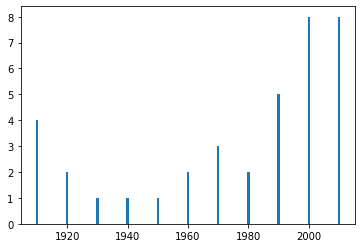

In [42]:
#hamlet_df = movies[movies.title.str.contains("Hamlet",case=False)]
hamlet_decade = hamlet_df.groupby('year')
hamlet_dict = {'decade':[],'no_of_films':[]}
for key,value in hamlet_decade:
    #Group movies per decade
    hamlet_dict['decade'].append((key//10)*10)
    hamlet_dict['no_of_films'].append(value['title'].value_counts().sum())
decades = hamlet_dict['decade']

my_dict = {i:decades.count(i) for i in decades}  
plt.bar(*zip(*my_dict.items()))
plt.show()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [43]:
df1 = cast[cast['n'].notnull()]
df2 = df1[(df1.year >= 1960) & (df1.year < 1970)]
df2.shape[0]

131316

In [44]:
df3 = df1[(df1.year >= 2000) & (df1.year <= 2009)]
df3.shape[0]

497847

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [45]:
f_oz_2 = cast[cast['name'] == 'Frank Oz']
x = f_oz_2.groupby('year')
for key, val in x:
    if val['title'].count() > 1:
        print(key,val['title'],val['character'])


1979 1723645    The Muppet Movie
1723646    The Muppet Movie
1723647    The Muppet Movie
1723648    The Muppet Movie
1723649    The Muppet Movie
1723650    The Muppet Movie
1723651    The Muppet Movie
1723652    The Muppet Movie
Name: title, dtype: object 1723645                  Miss Piggy
1723646                 Fozzie Bear
1723647                      Animal
1723648               Sam the Eagle
1723649            Doc Hopper's Men
1723650                Marvin Suggs
1723651    Swedish Chef (assistant)
1723652              Motorcycle Guy
Name: character, dtype: object
1980 1723621    Star Wars: Episode V - The Empire Strikes Back
1723628                                The Blues Brothers
Name: title, dtype: object 1723621                   Yoda
1723628    Corrections Officer
Name: character, dtype: object
1981 1723598    An American Werewolf in London
1723599    An American Werewolf in London
1723632            The Great Muppet Caper
1723633            The Great Muppet Caper
1723634    

In [46]:
f_oz_2 = cast[cast['name'] == 'Frank Oz']
f_oz_2.head(10)

,title,year,name,type,character,n
1723598,An American Werewolf in London,1981,Frank Oz,actor,Mr. Collins,13.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723600,Blues Brothers 2000,1998,Frank Oz,actor,Warden,4.0
1723601,Follow That Bird,1985,Frank Oz,actor,Cookie Monster,3.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
1723603,Follow That Bird,1985,Frank Oz,actor,Grover,3.0
1723604,Innocent Blood,1992,Frank Oz,actor,Pathologist,21.0
1723605,Inside Out,2015,Frank Oz,actor,Subconscious Guard Dave,14.0
1723606,Labyrinth,1986,Frank Oz,actor,The Wiseman,17.0
1723607,"Monsters, Inc.",2001,Frank Oz,actor,Fungus,9.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [47]:
for key, val in x:
    if val['title'].count() >= 2:
        print(val['character'])

1723645                  Miss Piggy
1723646                 Fozzie Bear
1723647                      Animal
1723648               Sam the Eagle
1723649            Doc Hopper's Men
1723650                Marvin Suggs
1723651    Swedish Chef (assistant)
1723652              Motorcycle Guy
Name: character, dtype: object
1723621                   Yoda
1723628    Corrections Officer
Name: character, dtype: object
1723598      Mr. Collins
1723599       Miss Piggy
1723632       Miss Piggy
1723633      Fozzie Bear
1723634           Animal
1723635    Sam the Eagle
1723636           Gramps
1723637     Swedish Chef
Name: character, dtype: object
1723629    Aughra, a Keeper Of Secrets (performer)
1723630                    Chamberlain (performer)
Name: character, dtype: object
1723622             Yoda
1723624    Brain Surgeon
1723660      Corrupt Cop
Name: character, dtype: object
1723653                        Miss Piggy
1723654                            Fozzie
1723655                           

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

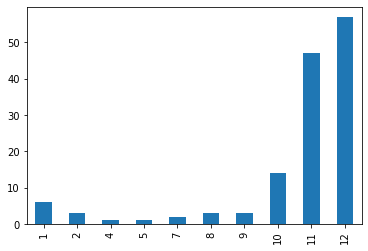

In [48]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

<AxesSubplot:>

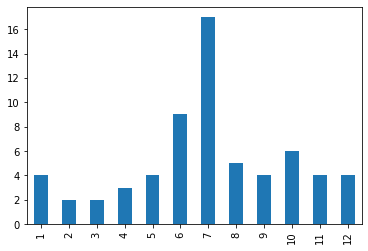

In [49]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

C:\Users\siddi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


<AxesSubplot:>

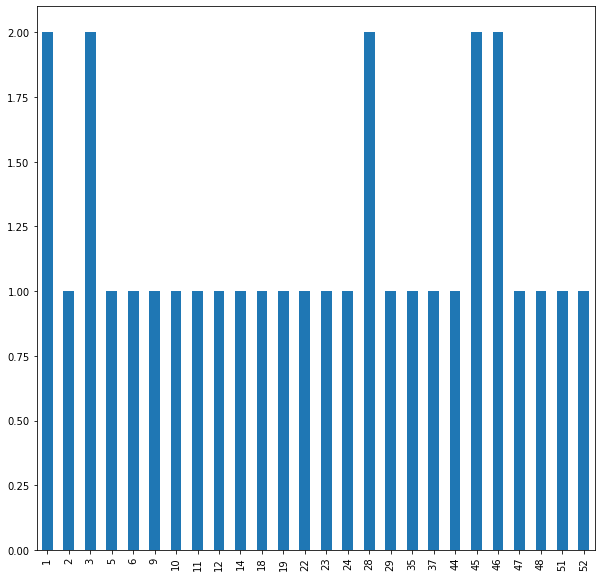

In [50]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar',figsize=(10,10))

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [63]:
release_dates = pd.DataFrame(release_dates)
cast = pd.DataFrame(cast)

df_temp = pd.merge(cast, release_dates, on=["title", "year"])
a = df_temp[df_temp['name'] == "Keanu Reeves"]
b = a[a['country'] == 'USA'].sort_values(by='date')
b[['title','date']]

new_df = pd.merge(cast, release_dates,  how='left', left_on=['title','year'], right_on = ['title','year'])


In [64]:
#new_df.head(10)
a = new_df[new_df['name'] == "Keanu Reeves"]
b = a[a['country'] == 'USA'].sort_values(by='date')
b[['title','date']]

,title,date
10726807,Youngblood,1986-01-31
10726175,River's Edge,1987-05-08
10726692,The Night Before,1988-04-15
10726152,Permanent Record,1988-04-22
10725633,Bill & Ted's Excellent Adventure,1989-02-17
10725745,Dangerous Liaisons,1989-02-24
10726136,Parenthood,1989-05-26
10725868,I Love You to Death,1990-04-06
10726800,Tune in Tomorrow...,1990-11-02
10726153,Point Break,1991-07-12


In [65]:
release_dates.head(10)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
5,#Horror,2015,USA,2015-11-20
6,#Horror,2015,UK,2016-05-16
7,#Lucky Number,2015,USA,2015-09-01
8,#Nerealnaya lyubov,2014,Russia,2014-02-13
9,#Pellichoopulu,2016,India,2016-07-29


In [66]:
a = df_temp[df_temp['name'] == "Keanu Reeves"]
b = a[a['year'] == '1922'].sort_values(by='date')
b.head()

,title,year,name,type,character,n,country,date


In [ ]:
cast.head(10)

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

<AxesSubplot:>

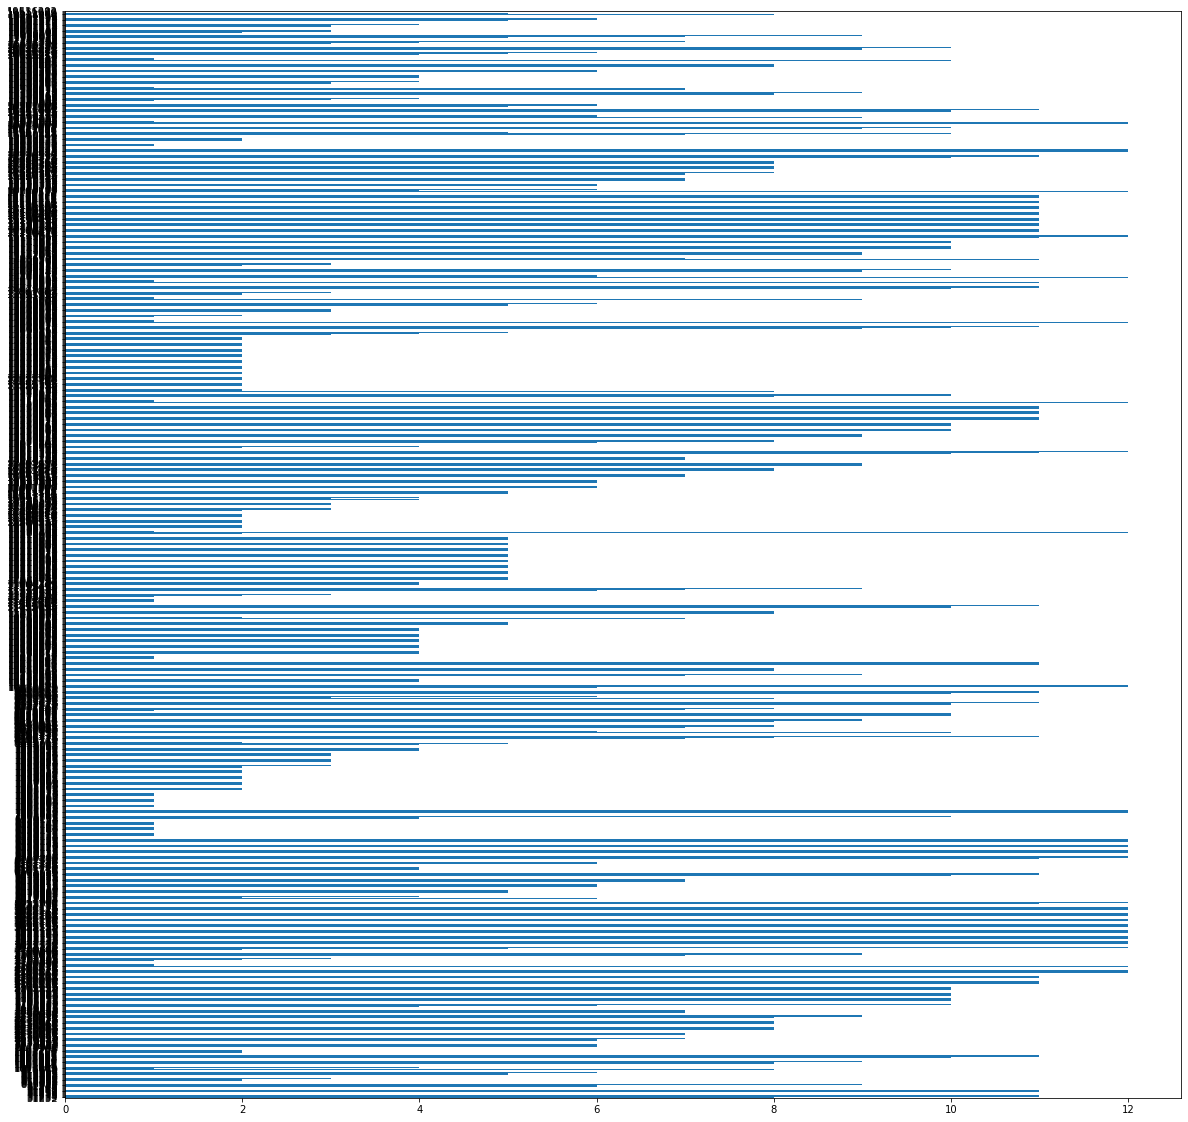

In [68]:
a.date.dt.month.plot(kind='barh',figsize=(20,20))

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

<AxesSubplot:ylabel='title'>

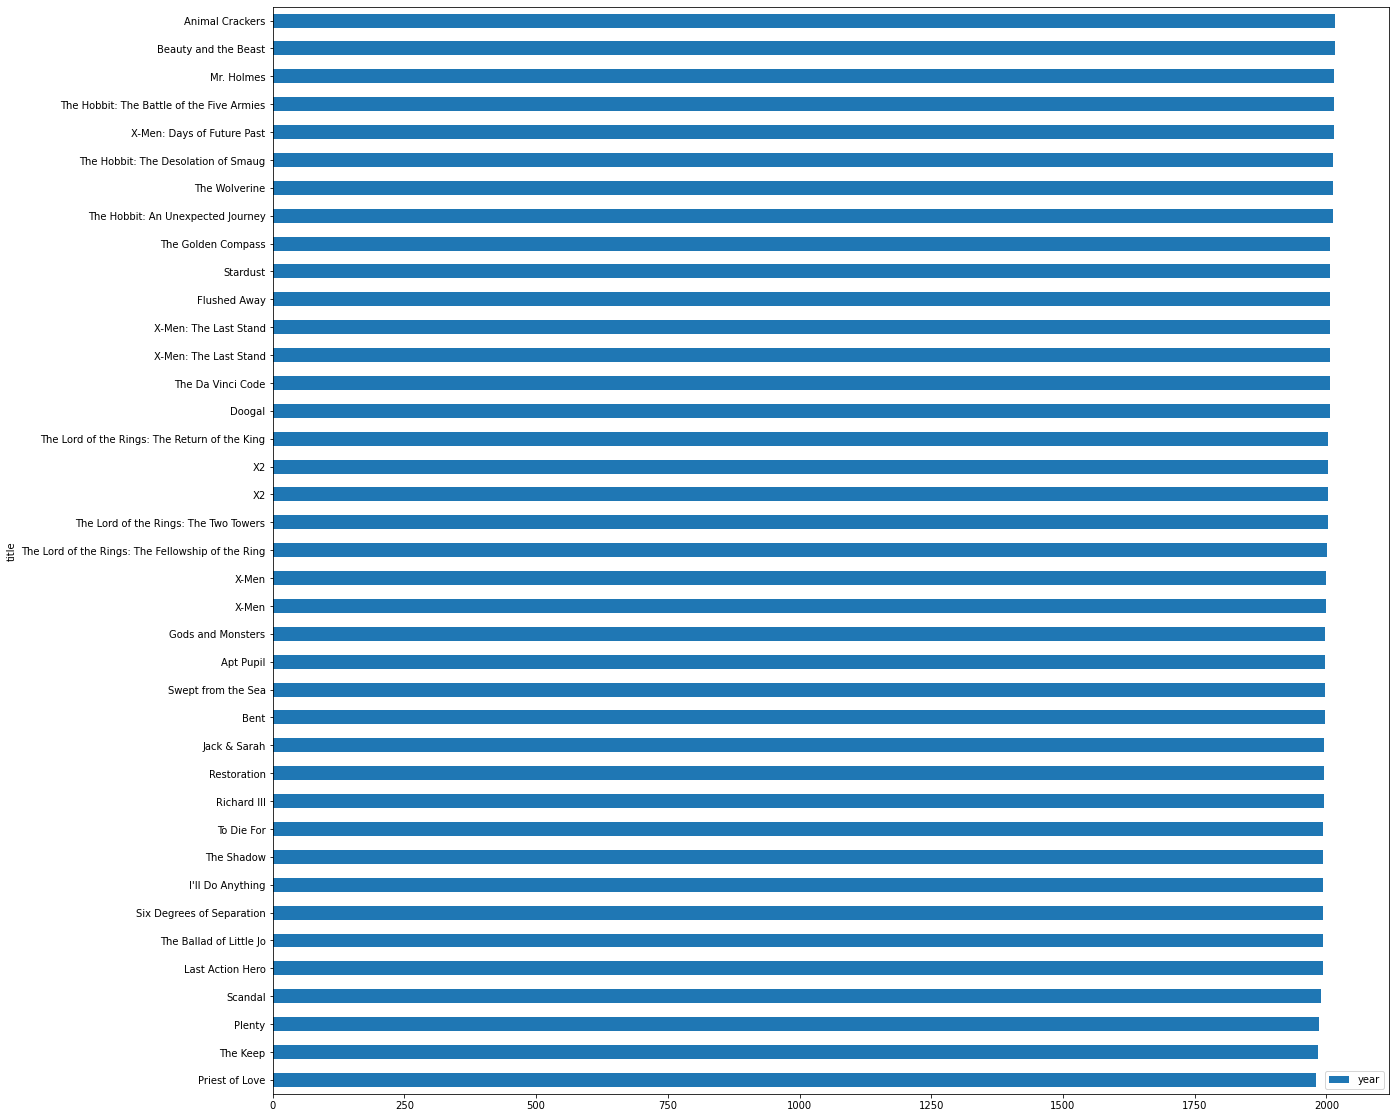

In [69]:
df_temp = cast.merge(release_dates, left_on='title', right_on='title')
tmp = new_df[new_df['name'] == "Ian McKellen"]
tmp2 = tmp[tmp['country'] == 'USA'].sort_values(by='date')
tmp2[['title','date']]
tmp2.plot(kind='barh',x='title',y='year',figsize=(20,20))